In [23]:
import sys  
sys.path.insert(0, './')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Importing

In [24]:
df = pd.read_csv('../../data/prices_round_3_day_0.csv', index_col='timestamp', delimiter=';')
df

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,0,DIVING_GEAR,99999.0,6.0,99998.0,19.0,NaN,NaN,100001.0,6.0,100002.0,19.0,NaN,NaN,100000.0,0.0
0,0,PEARLS,9998.0,1.0,9995.0,30.0,NaN,NaN,10005.0,30.0,NaN,NaN,NaN,NaN,10001.5,0.0
0,0,COCONUTS,8113.0,205.0,NaN,NaN,NaN,NaN,8116.0,205.0,NaN,NaN,NaN,NaN,8114.5,0.0
0,0,BERRIES,3997.0,19.0,3996.0,58.0,NaN,NaN,4003.0,19.0,4005.0,58.0,NaN,NaN,4000.0,0.0
0,0,BANANAS,4893.0,1.0,4892.0,30.0,NaN,NaN,4899.0,30.0,NaN,NaN,NaN,NaN,4896.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999900,0,BERRIES,3917.0,16.0,3916.0,41.0,NaN,NaN,3924.0,57.0,NaN,NaN,NaN,NaN,3920.5,243300.0
999900,0,PEARLS,9996.0,2.0,9995.0,21.0,NaN,NaN,10004.0,2.0,10005.0,21.0,NaN,NaN,10000.0,-408.0
999900,0,BANANAS,4870.0,23.0,NaN,NaN,NaN,NaN,4876.0,2.0,4877.0,21.0,NaN,NaN,4873.0,121460.0


In [25]:
df_pearls = df.loc[df['product']=='PEARLS'][['mid_price']].rename(columns={'mid_price': 'pearls'})
df_bananas = df.loc[df['product']=='BANANAS'][['mid_price']].rename(columns={'mid_price': 'bananas'})
df_pina_coladas = df.loc[df['product']=='PINA_COLADAS'][['mid_price']].rename(columns={'mid_price': 'pina_coladas'})
df_coconuts = df.loc[df['product']=='COCONUTS'][['mid_price']].rename(columns={'mid_price': 'coconuts'})
df_berries = df.loc[df['product']=='BERRIES'][['mid_price']].rename(columns={'mid_price': 'berries'})
df_diving_gear = df.loc[df['product']=='DIVING_GEAR'][['mid_price']].rename(columns={'mid_price': 'diving_gear'})
df_dolphin_sightings = df.loc[df['product']=='DOLPHIN_SIGHTINGS'][['mid_price']].rename(columns={'mid_price': 'dolphin_sightings'})
df = pd.concat([df_pearls, df_bananas, df_pina_coladas, df_coconuts, df_berries, df_diving_gear, df_dolphin_sightings], axis=1)
df.columns = pd.MultiIndex.from_product([['mid_price'], df.columns.tolist()])
df

mid_price                                                    \
             pearls bananas pina_coladas coconuts berries diving_gear   
timestamp                                                               
0           10001.5  4896.0      15226.5   8114.5  4000.0    100000.0   
100          9999.0  4894.0      15224.5   8114.0  3999.5    100000.0   
200         10000.0  4895.5      15226.5   8114.5  3998.5    100002.5   
300          9997.0  4896.0      15225.5   8114.0  3998.5    100000.0   
400         10001.0  4896.5      15221.5   8113.0  3999.5     99994.5   
...             ...     ...          ...      ...     ...         ...   
999500       9998.5  4870.5      15005.5   8002.0  3920.5     98899.0   
999600       9999.0  4869.5      15003.5   8001.0  3922.0     98909.5   
999700      10000.0  4875.5      15004.5   8001.0  3920.5     98906.0   
999800      10000.0  4872.5      15011.5   8003.0  3918.0     98907.5   
999900      10000.0  4873.0      15012.5   8003.5  3920.5     98915.0   

                             
          dolphin_sightings  
timestamp                    
0                    3000.0  
100                  3000.0  
200                  2999.0  
300                  2999.0  
400                  2999.0  
...                     ...  
999500               3046.0  
999600               3046.0  
999700               3047.0  
999800               3047.0  
999900               3047.0  

[10000 rows x 7 columns]

# Initial Returns Observation

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>], dtype=object)

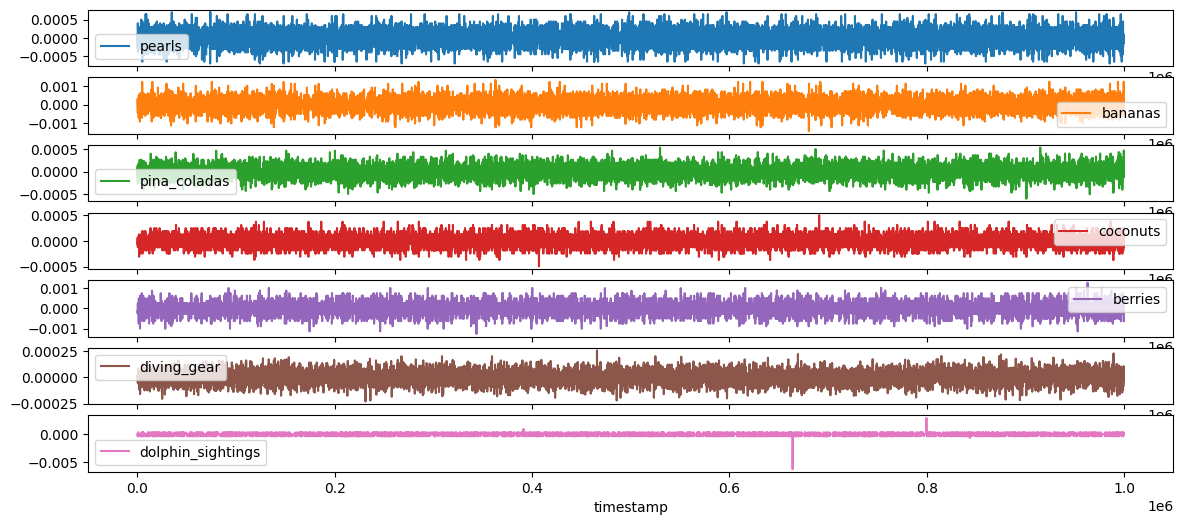

In [26]:
returns = np.log(df['mid_price']/ df['mid_price'].shift(1))
returns.dropna(inplace=True)
returns.plot(subplots=True, figsize=(14,6))

# Correlation Plots

array([[<Axes: xlabel='pearls', ylabel='pearls'>,
        <Axes: xlabel='bananas', ylabel='pearls'>,
        <Axes: xlabel='pina_coladas', ylabel='pearls'>,
        <Axes: xlabel='coconuts', ylabel='pearls'>,
        <Axes: xlabel='berries', ylabel='pearls'>,
        <Axes: xlabel='diving_gear', ylabel='pearls'>,
        <Axes: xlabel='dolphin_sightings', ylabel='pearls'>],
       [<Axes: xlabel='pearls', ylabel='bananas'>,
        <Axes: xlabel='bananas', ylabel='bananas'>,
        <Axes: xlabel='pina_coladas', ylabel='bananas'>,
        <Axes: xlabel='coconuts', ylabel='bananas'>,
        <Axes: xlabel='berries', ylabel='bananas'>,
        <Axes: xlabel='diving_gear', ylabel='bananas'>,
        <Axes: xlabel='dolphin_sightings', ylabel='bananas'>],
       [<Axes: xlabel='pearls', ylabel='pina_coladas'>,
        <Axes: xlabel='bananas', ylabel='pina_coladas'>,
        <Axes: xlabel='pina_coladas', ylabel='pina_coladas'>,
        <Axes: xlabel='coconuts', ylabel='pina_coladas'>,
      

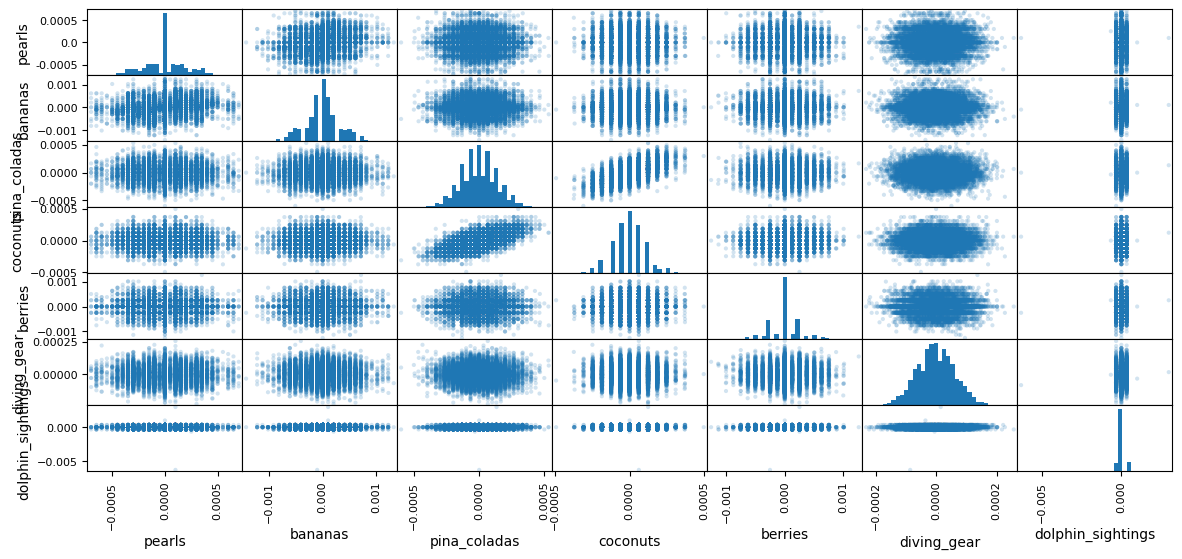

In [27]:
pd.plotting.scatter_matrix(returns, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(14,6))

<Axes: >

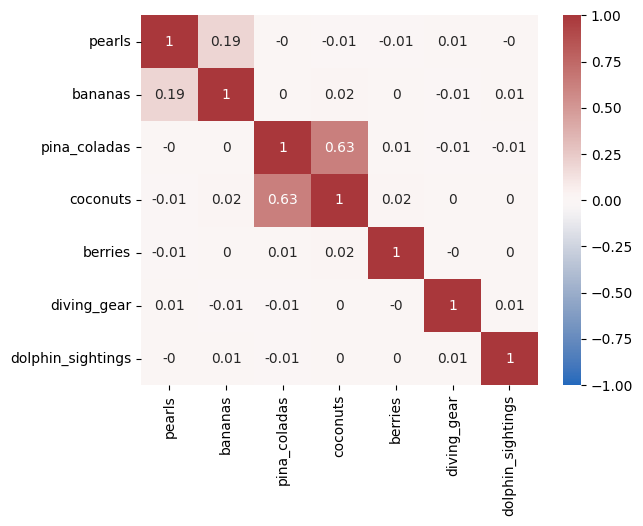

In [28]:
sns.heatmap(returns.corr().round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')

# Pairwise Scatter Plots

## Pearls vs Bananas

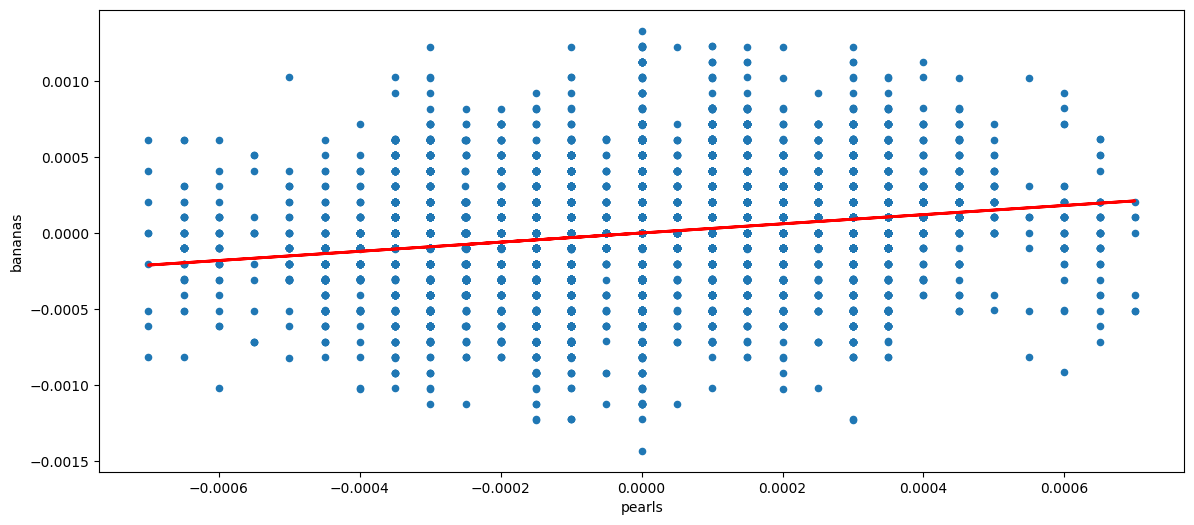

In [29]:
regression_pearls_bananas = np.polyfit(returns['pearls'], returns['bananas'], deg=1)

ax_PB = returns.plot(kind='scatter', x= 'pearls', y='bananas', figsize=(14,6))
ax_PB.plot(returns['pearls'], np.polyval(regression_pearls_bananas, returns['pearls']), 'r', lw=2)

In [30]:
returns.corr()

,pearls,bananas,pina_coladas,coconuts,berries,diving_gear,dolphin_sightings
pearls,1.000000,0.189859,-0.002672,-0.008166,-0.009371,0.005419,-0.004398
bananas,0.189859,1.000000,0.003895,0.017089,0.001372,-0.006592,0.006007
pina_coladas,-0.002672,0.003895,1.000000,0.625630,0.006812,-0.006256,-0.008444
coconuts,-0.008166,0.017089,0.625630,1.000000,0.019344,0.003507,0.001481
berries,-0.009371,0.001372,0.006812,0.019344,1.000000,-0.004334,0.002451
diving_gear,0.005419,-0.006592,-0.006256,0.003507,-0.004334,1.000000,0.007456
dolphin_sightings,-0.004398,0.006007,-0.008444,0.001481,0.002451,0.007456,1.000000


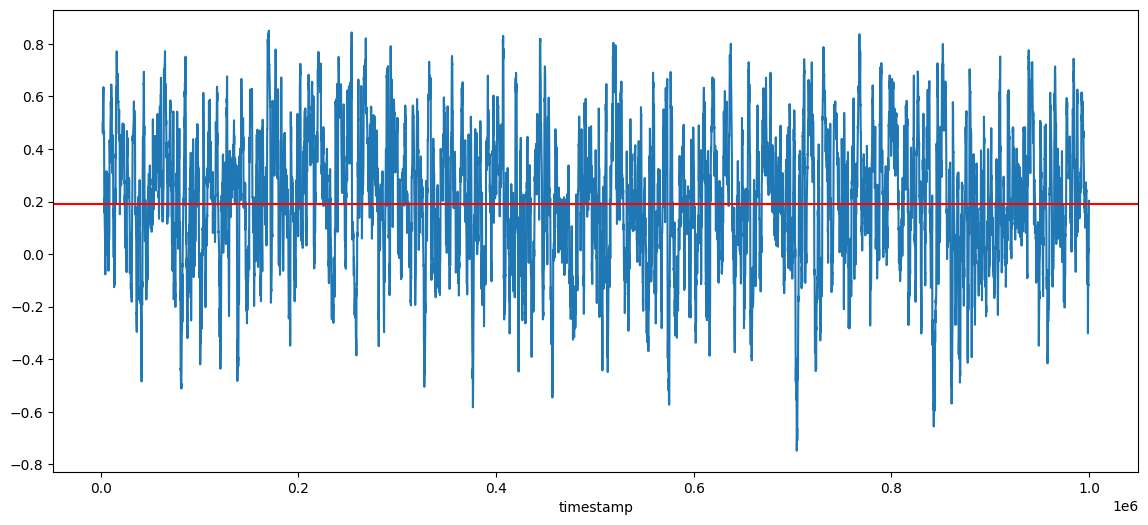

In [31]:
ax = returns['pearls'].rolling(window=20).corr(returns['bananas']).plot(figsize=(14,6))
ax.axhline(returns.corr().iloc[0,1], c='r')

## Coconuts vs Pina Coladas

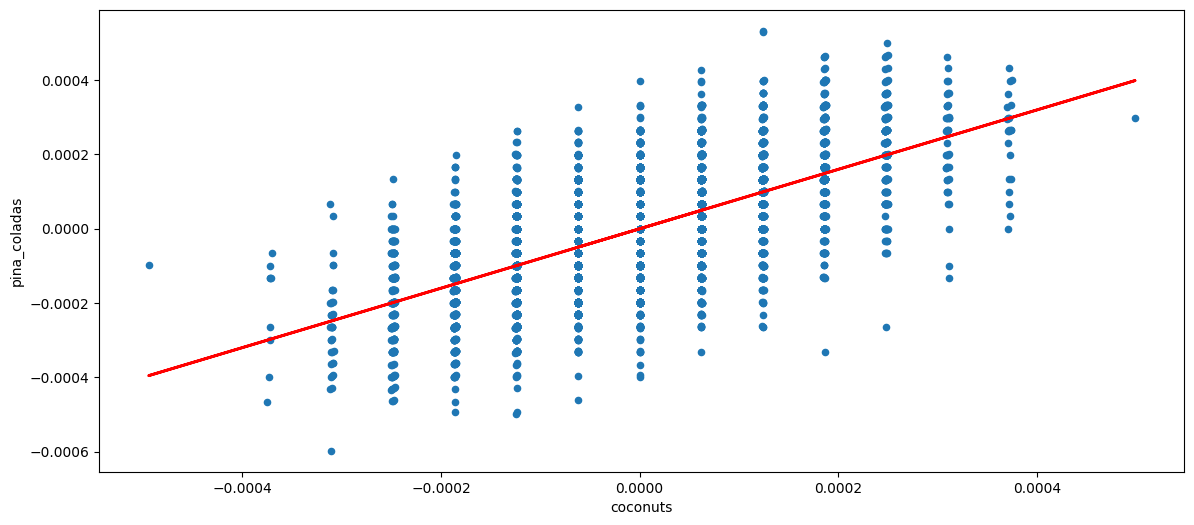

In [32]:
regression_coconuts_coladas = np.polyfit(returns['coconuts'], returns['pina_coladas'], deg=1)

ax_CPC = returns[['coconuts', 'pina_coladas']].plot(kind='scatter', x= 'coconuts', y='pina_coladas', figsize=(14,6))
ax_CPC.plot(returns['coconuts'], np.polyval(regression_coconuts_coladas, returns['coconuts']), 'r', lw=2)

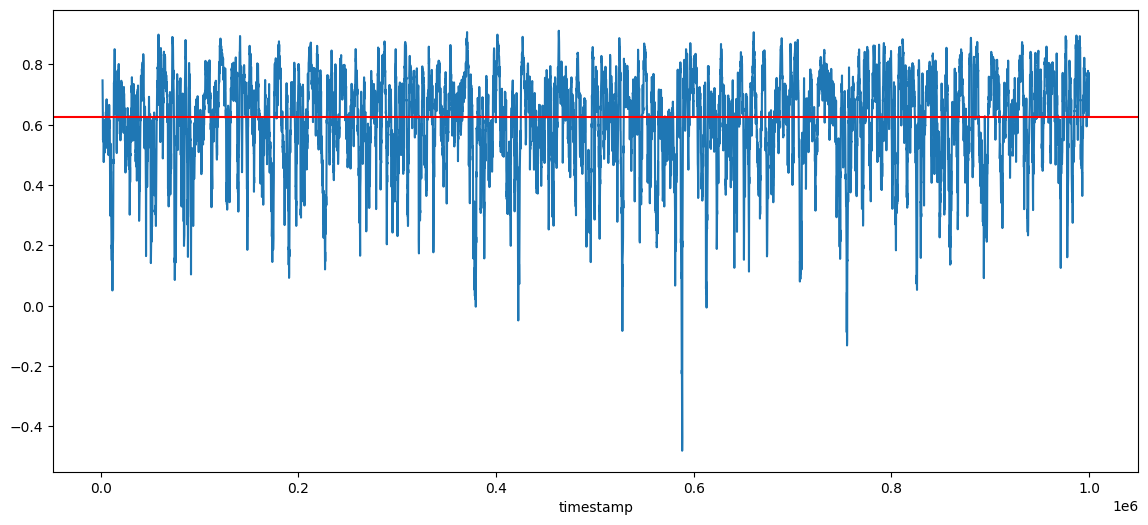

In [33]:
ax_CPC = returns['coconuts'].rolling(window=20).corr(returns['pina_coladas']).plot(figsize=(14,6))
ax_CPC.axhline(returns.corr().iloc[2,3], c='r')